In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

thw_new.nc and mhw_new.nc are files with heatwave days for coastal and adjacent ocean cells respectively (in and around Tasmania). combined.nc is the addition of both

In [2]:
thw_da = xr.open_dataarray('thw_new.nc')
mhw_da = xr.open_dataarray('mhw_new.nc')
combined_da = xr.open_dataarray('combined.nc')

Analysis for one grid cell

In [3]:
thw = np.asarray(thw_da[90])
mhw = np.asarray(mhw_da[90])
add = np.asarray(combined_da[90])

In [4]:
sum(add==2)

171

Proportion of co-occurring events over non co-occurring events (with respect to total number of terrestrial heatwave days

In [5]:
co_occ = sum(add==2)
non_co_occ = sum(thw==1) - co_occ
prop = co_occ/non_co_occ
prop

0.48169014084507045

## Monte Carlo simulation 

In [19]:
proportion_rand_v2 = []
thw_ = []
N = len(thw)
for n in range (10000):
    # cut THW timeseries at a random point and swap the beginning and end 
    r = int(np.ceil(np.random.randint(N-1)))
    thw_[0:r] = thw[-1-r+1:]
    thw_[r:N] = thw[0:-1-r+1]
    thw_ = np.array(thw_)
    
    # calculate proportion
    add = mhw + thw_
    co_occ = sum(add==2)
    non_co_occ = sum(thw_==1) - co_occ
    prop_rand_v2 = co_occ/non_co_occ
    proportion_rand_v2.append(prop_rand_v2)

## Plotting the probability distribution function 

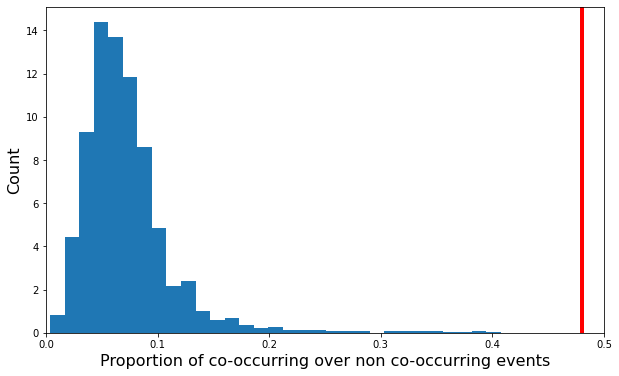

In [20]:
import scipy.stats as st
fig, ax = plt.subplots(figsize=(10,6)) 
plt.hist(proportion_rand_v2, density=True, bins=40, label="Proportion of THWs with co-occurring MHWs")
plt.xlim(xmin=0, xmax = 0.5)
plt.axvline(x=0.48, color='r', linewidth=4)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Proportion of co-occurring over non co-occurring events', fontsize=16)

plt.savefig('Tas-single-point-v2')